## Scraping a Table from a Webpage in order to Construct a Bipartite Graph
### Moses A. Boudourides

### Choose randomly a wikipedia page with a table from the "Category: Lists of websites"  https://en.wikipedia.org/wiki/Category:Lists_of_websites, derive a pandas dataframe and a bipartite graph as in the following example:

In [1]:
import random
import pandas as pd
import operator
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### The Dataframe of ESPN 2018-2019 NBA Season Leaders

In [2]:
url='http://www.espn.com/nba/seasonleaders'

In [3]:
df=pd.read_html(url,header=1)[0]
df

,RK,PLAYER,TEAM,GP,MPG,FG%,FT%,3PM,RPG,APG,STPG,BLKPG,TOPG,PTS,ESPN
0,1,"James Harden, PG",HOU,78,36.8,.442,.879,4.8,6.6,7.5,2.0,0.7,5.0,36.1,56.5
1,2,"Giannis Antetokounmpo, PF",MIL,72,32.8,.578,.729,0.7,12.5,5.9,1.3,1.5,3.7,27.7,53.4
2,3,"Anthony Davis, PF",LAL,56,33.0,.517,.794,0.9,12.0,3.9,1.6,2.4,2.0,25.9,50.0
3,4,"LeBron James, SF",LAL,55,35.2,.510,.665,2.0,8.5,8.3,1.3,0.6,3.6,27.4,49.6
4,NaN,"Joel Embiid, C",PHI,64,33.7,.484,.804,1.2,13.6,3.7,0.7,1.9,3.5,27.5,49.6
5,6,"Russell Westbrook, SG",OKC,73,36.0,.428,.656,1.6,11.1,10.7,1.9,0.5,4.5,22.9,48.0
6,7,"Karl-Anthony Towns, C",MIN,77,33.1,.518,.836,1.8,12.4,3.4,0.9,1.6,3.1,24.4,46.1
7,8,"Paul George, SG",OKC,77,36.9,.438,.839,3.8,8.2,4.1,2.2,0.4,2.7,28.0,45.2
8,9,"Kevin Durant, SF",GSW,78,34.6,.521,.885,1.8,6.4,5.9,0.7,1.1,2.9,26.0,45.0
9,10,"Stephen Curry, PG",GSW,69,33.8,.472,.916,5.1,5.3,5.2,1.3,0.4,2.8,27.3,44.0


In [4]:
df=df.drop([10,21,32,43])
# df

In [5]:
df=df.loc[df[u'BLKPG'] > str(0.5)]
# df

### The Bipartite Graph of Player vs. BLKPG

In [6]:
Name=list(df.columns)
index0=Name.index('PLAYER')
index1=Name.index('BLKPG')

In [7]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[index0]] 
    b=df.iloc[i][Name[index1]] 
    eds.append((a,b))
print len(eds),len(set(eds))

28 28


In [8]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[index0] #+"s"
dc1=Name[index1] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[index0]].tolist()]
so=[n for n in H.nodes() if n in df[Name[index1]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
Hl[0].nodes()
print 'The largest connected component has:'
# for n in Hc.nodes():
#     if type(n)==str:
#         n.encode('ascii', 'ignore')
Hcnodes=[n.encode('ascii', 'ignore') for n in Hc.nodes() if type(n)==str]
Hcedges=[]
for e in Hc.edges():
    t=[]
    if type(e[0])==str:
        t.append(e[0].encode('ascii', 'ignore'))
    if type(e[1])==str:
        t.append(e[1].encode('ascii', 'ignore'))
    Hcedges.append(tuple(t))
print "%i nodes and %i edges" %(len(Hcnodes), len(Hcedges))

The graph of PLAYER vs. BLKPG has 41 nodes and 28 edges
The 41 nodes of this graph are:
28 PLAYER and 13 BLKPG
This graph is bipartite
This graph is not connected and has 13 connected components
The largest connected component has:
8 nodes and 7 edges


In [9]:
# pos=nx.spring_layout(H,0.18)
# labels={}
# for i in H.nodes():
#     labels[i]=i
# #     if i in ca:
# #         labels[i]=i
# #     else:
# #         labels[i]=''
# # for i in H.nodes():
# #     if H.degree(i)>1:
# #         labels[i]=i
# #     else:
# #         labels[i]='' #i
# fig = plt.figure(figsize=(14,14))
# nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
# nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
# nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
# sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
# fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
# plt.axis('off');

In [10]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

7


'0.6'

In [11]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

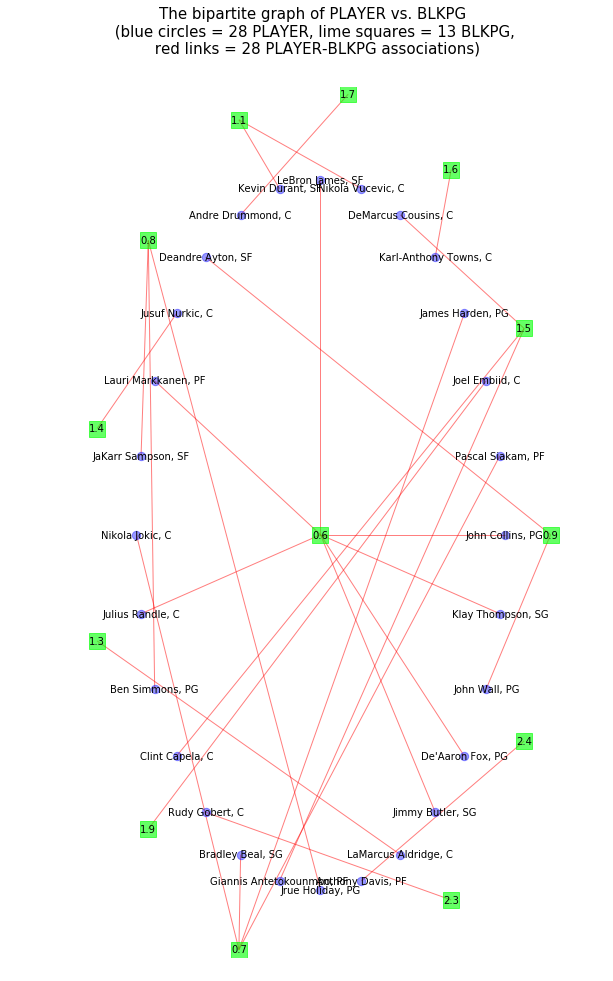

In [12]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(10,16))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=250,font_size=10,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=10);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, lime squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=15);
plt.axis('off');
plt.margins(x=0.1, y=0) 

### The Bipartite Graph of Player vs. STPG

In [13]:
Name=list(df.columns)
index0=Name.index('PLAYER')
index1=Name.index('STPG')

In [14]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[index0]] 
    b=df.iloc[i][Name[index1]] 
    eds.append((a,b))
print len(eds),len(set(eds))

28 28


In [15]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[index0] #+"s"
dc1=Name[index1] #+"es"
print "The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges()))
ca=[n for n in H.nodes() if n in df[Name[index0]].tolist()]
so=[n for n in H.nodes() if n in df[Name[index1]].tolist()]
nt=len(ca)
nh=len(so)
print "The %i nodes of this graph are:" %len(H.nodes())
print "%i %s and %i %s" %(nt,dc0,nh,dc1)
if nx.is_bipartite(H)==True:
    print "This graph is bipartite"
else:
    print "This graph is not bipartite"
if nx.is_connected(H)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(H), "connected components"
Hl = sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
Hl[0].nodes()
print 'The largest connected component has:'
# for n in Hc.nodes():
#     if type(n)==str:
#         n.encode('ascii', 'ignore')
Hcnodes=[n.encode('ascii', 'ignore') for n in Hc.nodes() if type(n)==str]
Hcedges=[]
for e in Hc.edges():
    t=[]
    if type(e[0])==str:
        t.append(e[0].encode('ascii', 'ignore'))
    if type(e[1])==str:
        t.append(e[1].encode('ascii', 'ignore'))
    Hcedges.append(tuple(t))
print "%i nodes and %i edges" %(len(Hcnodes), len(Hcedges))

The graph of PLAYER vs. STPG has 42 nodes and 28 edges
The 42 nodes of this graph are:
28 PLAYER and 14 STPG
This graph is bipartite
This graph is not connected and has 14 connected components
The largest connected component has:
6 nodes and 5 edges


In [16]:
# pos=nx.spring_layout(H,0.18)
# labels={}
# for i in H.nodes():
#     labels[i]=i
# #     if i in ca:
# #         labels[i]=i
# #     else:
# #         labels[i]=''
# # for i in H.nodes():
# #     if H.degree(i)>1:
# #         labels[i]=i
# #     else:
# #         labels[i]='' #i
# fig = plt.figure(figsize=(14,14))
# nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
# nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,font_size=20,alpha=0.6);
# nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
# nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
# sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
# fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
# plt.axis('off');

In [17]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print max(x.values())
xx={i:j for i,j in x.items() if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(x.items())
n0

5


'0.7'

In [18]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in posa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in posaa.items(): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(posb.items()+posa.items()+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(posb.items()+posaa.items()+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

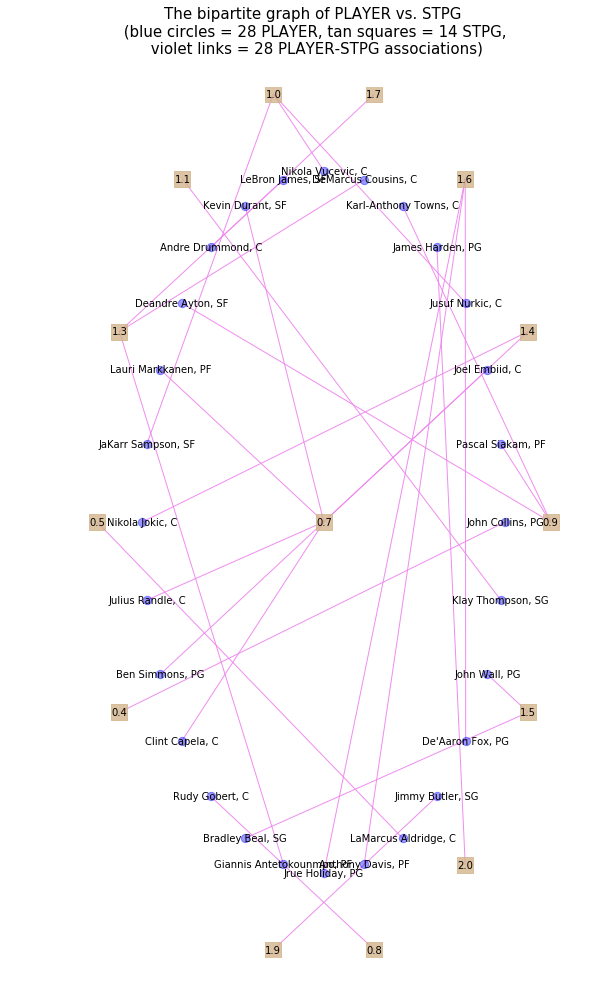

In [19]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(10,16))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,font_size=20,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='tan',node_shape="s",node_size=250,font_size=10,alpha=0.8);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='violet',alpha=0.9);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=10);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, tan squares = %i %s, \n violet links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=15);
plt.axis('off');
plt.margins(x=0.1, y=0) 